#Prediction using Supervised ML

Created by:- Saurabh Kamble 

Problem Statement:- Predict the percentage of an student based on the no. of study hour, What will be predicted score if a student studies for 9.25 hrs/ day?

Data set used:-http://bit.ly/w-data

> Indented block



As there are only 2 variables "Hours and scores" we will use simple Linear Regression.

In [31]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [32]:
#importing the data
url="http://bit.ly/w-data"
dataset=pd.read_csv(url)
dataset.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Lets plot our data on 2d graph to assume relationship between the 2 variables

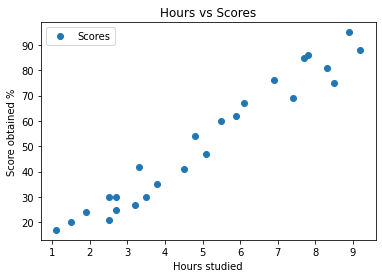

In [33]:
#Plotting the distributon on graph
dataset.plot(x="Hours",y="Scores",style="o")
plt.title("Hours vs Scores")
plt.xlabel("Hours studied")
plt.ylabel("Score obtained %")
plt.show()

As we can see that scores increases as hours studies increases
there is a positive linear relationship between hours and scores


# Preparing the data

Dividing the data set in attributes and labels(inputs and outputs)

In [34]:
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,1].values


# Splitting the data set

Lets now split the dataset into test and train
We'll do this by using Scikit-Learn's built-in train_test_split() 

In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

# Training the algorithm

In [37]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)
print("training is done")

training is done


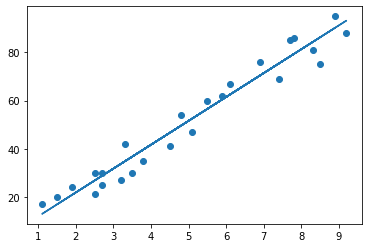

In [38]:
#plotting the regression line

line= regressor.coef_*x+regressor.intercept_

#plotting for the test data

plt.scatter(x,y)
plt.plot(x,line);
plt.show()





# making predictions

In [39]:
# lets make predictions
print(x_test) # testing 
y_pred = regressor.predict(x_test) #predicting the scores


[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [40]:
#comparing predicted with actual
df=pd.DataFrame({"actual":y_test, "predicted":y_pred}) 
df

,actual,predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [46]:
# now lets test What will be predicted score if a student studies for 9.25 hrs/ day
hours=9.25
my_pred = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(my_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737539


# Model evaluation

In this step we wil check how different algorithm perform on this data set

In [47]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002982
